## 【問題1】コンペティション内容の確認  
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

何を学習し、何を予測するのか
どのようなファイルを作りKaggleに提出するか
提出されたものはどういった指標値で評価されるのか

## 何を学習し、何を予測するのか  
顧客データからその顧客がちゃんと借りた金を返すか返さないか？
 
  
## どのようなファイルを作りKaggleに提出するか  
testデータのSK_ID_CURR の列  
TARGET変数の予測  
csvファイル
  
## 提出されたものはどういった指標値で評価されるのか  
ターゲット変数と予測に関するROCカーブ

## 【問題2】学習と検証  
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。

検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

## データ　の確認

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('/Users/user/Downloads/material_dive/kaggle/home-credit-default-risk/application_train.csv')

In [3]:
df_real = pd.read_csv('/Users/user/Downloads/material_dive/kaggle/home-credit-default-risk/application_test.csv')

In [4]:
print(df_train.shape)
print(df_real.shape)

(307511, 122)
(48744, 121)


列の数が違う見たいなので調べてみる。

In [5]:
'''
print(df_train.shape)
print(df_real.shape)

(307511, 122)
(48744, 121)


'''

count = 0
list_= []
for i in df_real.columns:# realから列名をだす
    
    df_train_columns = df_train.columns[count]#trainの列名
    
    if i != df_train_columns:
        list_.append(df_train_columns)#列名が違うときだけリストに入れる
        count +=1#train列番号の補正
        
    
    count += 1
list_

['TARGET']

realデータの方には['TARGET'] が入ってなかったらしい。

In [6]:
df_real.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [7]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


ターゲット列の分布を調べる

In [10]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

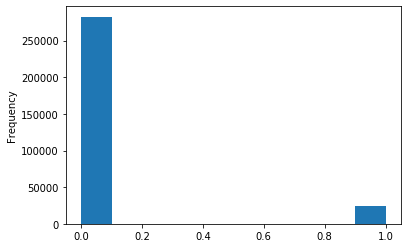

In [11]:
df_train['TARGET'].astype(int).plot.hist();

データ量が非常に偏っていることがわかった。
ほとんどが返した人である。

とりあえず今は何もしない、、


In [12]:
#copyした方がいいらしいのでコピーしとく

train = df_train.copy()
test = df_real.copy()

欠損値がいくつかあると思うのでそれについて処理してみる。


In [13]:
test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [14]:
test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

train_drop = train.dropna(axis = 1)
X_test_drop = test.dropna(axis = 1)

print('berore'+str(df_train.shape))
print('after'+str(train_drop.shape))
print('berore'+str(df_real.shape))
print('after'+str(X_test_drop.shape))

berore(307511, 122)
after(307511, 55)
berore(48744, 121)
after(48744, 57)


In [16]:
train_drop.drop(columns=['TARGET'])

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,...,0,0,0,0,0,0,0,0,0,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
307507,456252,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
307508,456253,Cash loans,F,N,Y,0,153000.0,677664.0,Working,Higher education,...,0,0,0,0,0,0,0,0,0,0
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X, y = train_drop.drop(columns=['TARGET']), train_drop['TARGET']

X_train, X_valid, y_train, y_valid =train_test_split(X, y, test_size=0.3, 
                                                   random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'Housing'

### 数値出ないと学習しないようなので文字データを処理する

In [19]:
# one-hot encoding of categorical variables
X_train_drop_oh = pd.get_dummies(X_train)

X_valid_drop_oh = pd.get_dummies(X_valid)

X_test_drop_oh = pd.get_dummies(X_test_drop)


print(X_train_drop_oh.shape)

print(X_valid_drop_oh.shape)

print(X_test_drop_oh.shape)

(215257, 143)
(92254, 143)
(48744, 143)


In [20]:
log_reg.fit(X_train_drop_oh, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
log_reg_pred_train = log_reg.predict(X_train_drop_oh)

In [46]:
log_reg_pred_train_proba = log_reg.predict_proba(X_train_drop_oh)

In [47]:
log_reg_pred_valid = log_reg.predict(X_valid_drop_oh)

In [48]:
log_reg_pred_valid_proba = log_reg.predict_proba(X_valid_drop_oh)

In [49]:
log_reg_pred_test = log_reg.predict(X_test_drop_oh)

In [50]:
log_reg_pred_test_pro  = log_reg.predict_proba(X_test_drop_oh)

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

print('train_accuracy'+str(accuracy_score(y_train, log_reg_pred_train)))
print('train_roc_score'+str(roc_auc_score(y_train, log_reg_pred_train_proba[:,1])))
print('valid_accuracy'+str(accuracy_score(y_valid, log_reg_pred_valid)))
print('valid_accuracy'+str(roc_auc_score(y_valid, log_reg_pred_valid_proba[:,1])))

train_accuracy0.9187715149797684
train_roc_score0.5959016043818212
valid_accuracy0.9204370542198712
valid_accuracy0.5897319175759748


In [29]:
log_reg_pred_train
log_reg_pred_valid

train_pred_0, train_pred_1 = np.unique(log_reg_pred_train, return_counts=True)
valid_pred_0, valid_pred_1 = np.unique(log_reg_pred_valid, return_counts=True)

print(np.asarray((train_pred_0, train_pred_1)))
print(np.asarray((valid_pred_0, valid_pred_1)))

[[     0]
 [215257]]
[[    0]
 [92254]]


In [54]:
y_train.value_counts()

0    197772
1     17485
Name: TARGET, dtype: int64

In [55]:
y_valid.value_counts()

0    84914
1     7340
Name: TARGET, dtype: int64

全部０と予測している。

## 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。

正しく提出が行えていれば、精度は低くても構いません。

In [56]:
submit = df_real[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred_test


submit.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


In [57]:
# Save the submission to a csv file
submit.to_csv('log_reg_predict.csv', index = False)

submit完了　　score 0.46586

## 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

どの特徴量を使うか
どう前処理をするか
何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。

精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

過学習

欠損値を消さないで,オブジェクトのみ処理する。

In [58]:
train_oh = pd.get_dummies(train)
test_oh = pd.get_dummies(test)
print(train_oh.shape)
print(test_oh.shape)

(307511, 246)
(48744, 242)


In [59]:
# かくデータ　の列をリストかする。
list1 = []
list2 = []

for i in test_oh.columns:
    list1.append(i)
    
for k in train_oh.columns:
    list2.append(k)

print(len(list1))
print(len(list2))

242
246


In [60]:
for i in list1:# list１の方が列が少ないのでlist1を使う　。
    list2.remove(i)
       
list2

['TARGET',
 'CODE_GENDER_XNA',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_FAMILY_STATUS_Unknown']

In [61]:
difference_test_train = list2

In [62]:
X, y = train_oh.drop(columns=difference_test_train), train_oh['TARGET']#テストデータ　にないものは削除

X_train_oh_only, X_valid_oh_only, y_train_oh_only, y_valid_oh_only =train_test_split(X, y, test_size=0.3, 
                                                   random_state=0)

In [63]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg_oh_only = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg_oh_only.fit(X_train_oh_only, y_train_oh_only)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

　#欠損値が多すぎるようだ。パターン２終了

欠損値を補完する

In [64]:
# impute missing values via the column mean

from sklearn.preprocessing import Imputer
def imputer_device(data):
    imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imr = imr.fit(data.values)
    imputed_data = imr.transform(data.values)
    return imputed_data

In [65]:
X_train_oh_ipt = imputer_device(X_train_oh_only)
X_valid_oh_ipt = imputer_device(X_valid_oh_only)
X_test_oh_ipt = imputer_device(test_oh)

In [66]:
log_reg_oh_ipt = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg_oh_ipt.fit(X_train_oh_ipt, y_train_oh_only)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
log_reg_oh_ipt_pred_train = log_reg_oh_ipt.predict(X_train_oh_ipt)
log_reg_oh_ipt_pred_train_proba = log_reg_oh_ipt.predict_proba(X_train_oh_ipt)

log_reg_oh_ipt_pred_valid = log_reg_oh_ipt.predict(X_valid_oh_ipt)
log_reg_oh_ipt_pred_valid_proba = log_reg_oh_ipt.predict_proba(X_valid_oh_ipt)

log_reg_oh_ipt_pred_test = log_reg_oh_ipt.predict(X_test_oh_ipt)

print('train_accuracy'+str(accuracy_score(y_train_oh_only, log_reg_oh_ipt_pred_train )))
print('train_roc_score'+str(roc_auc_score(y_train_oh_only, log_reg_oh_ipt_pred_train_proba[:,1])))
print('valid_accuracy'+str(accuracy_score(y_valid_oh_only, log_reg_oh_ipt_pred_valid )))
print('valid_accuracy'+str(roc_auc_score(y_valid_oh_only, log_reg_oh_ipt_pred_valid_proba[:, 1] )))

train_accuracy0.9187622237604351
train_roc_score0.6217698177427744
valid_accuracy0.9204370542198712
valid_accuracy0.6200884944080944


ちょっと上がった

In [87]:
submit = df_real[['SK_ID_CURR']]
submit['TARGET'] = log_reg_oh_ipt_pred_test
submit.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


In [88]:
# Save the submission to a csv file
submit.to_csv('log_reg_oh_ipt_predict.csv', index = False)

In [ ]:
score = 0.5

In [68]:
correlations = train_oh.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

もっとも相関関係のおおきいDAYS_BIRTHについて調査

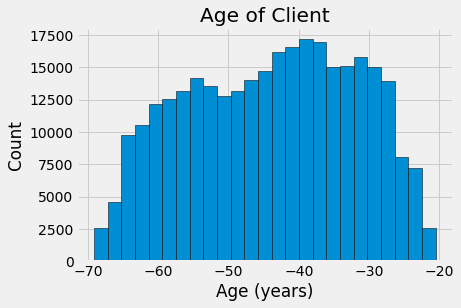

In [69]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train_oh['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

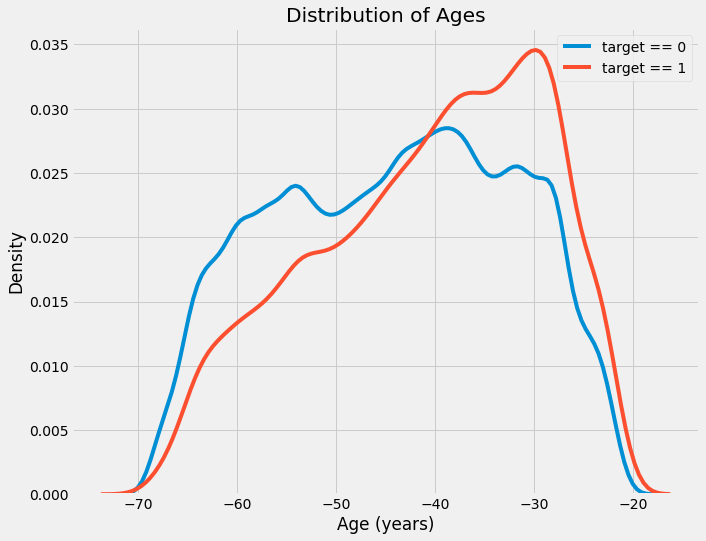

In [70]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_oh.loc[train_oh['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_oh.loc[train_oh['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

大した違いは得られなかった。

負の相関関係のつよいEXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3.に注目

In [71]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = train_oh[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


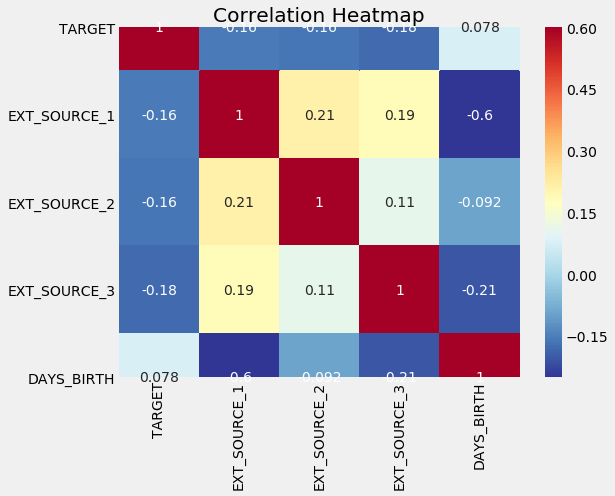

In [72]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

      多項式による特徴作り
      上記の外部ソースを組み合わせることで特徴量を作り、精度をあげる

In [73]:
# Make a new dataframe for polynomial features
poly_features = train_oh[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = test_oh[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [74]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [75]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [76]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


In [77]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = train_oh['SK_ID_CURR']
app_train_poly = train_oh.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test_oh['SK_ID_CURR']
app_test_poly = test_oh.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 277)
Testing data with polynomial features shape:   (48744, 277)


In [78]:
app_train_ipt =imputer_device(app_train_poly)
app_test_ipt = imputer_device(app_test_poly)

X, y = app_train_ipt, train_oh['TARGET']#テストデータ　にないものは削除

X_train_featured, X_valid_featured, y_train_featured, y_valid_featured =train_test_split(X, y, test_size=0.3, 
                                                   random_state=0)

In [79]:
log_reg_featured = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg_featured.fit(X_train_featured, y_train_featured)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
log_reg_featured_pred_train = log_reg_featured.predict(X_train_featured)
log_reg_featured_pred_train_proba = log_reg_featured.predict_proba(X_train_featured)

log_reg_featured_pred_valid = log_reg_featured.predict(X_valid_featured)
log_reg_featured_pred_valid_proba = log_reg_featured.predict_proba(X_valid_featured)



In [83]:
print('train_accuracy'+str(accuracy_score(y_train_featured, log_reg_featured_pred_train)))
print('train_roc_score'+str(roc_auc_score(y_train_featured, log_reg_featured_pred_train_proba[:, 1])))
print('valid_accuracy'+str(accuracy_score(y_valid_featured, log_reg_featured_pred_valid )))
print('valid_accuracy'+str(roc_auc_score(y_valid_featured, log_reg_featured_pred_valid_proba[:, 1])))

train_accuracy0.9187715149797684
train_roc_score0.5846258272257322
valid_accuracy0.9204370542198712
valid_accuracy0.5792151527055519


In [84]:
log_reg_featured_pred_test = log_reg_featured.predict(app_test_ipt)

In [85]:
# Make a submission dataframe
submit = df_real[['SK_ID_CURR']]
submit['TARGET'] = log_reg_featured_pred_test 

# Save the submission dataframe
submit.to_csv('log_reg_featured_ipt_poly.csv', index = False)

In [ ]:
score = 0.5